In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula as smf
import patsy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV

In [2]:
df=pd.read_excel('emlakjet_istanbul_dataset.xlsx')
df.head()

,Fiyat (TL),Şehir,İlçe,Mahalle,İlan Numarası,İlan Güncelleme Tarihi,Kategorisi,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,...,Aidat,Takas,Banyo Metrekare,WC Sayısı,Fiyat Durumu,Balkon Metrekare,Balkon Sayısı,Salon Metrekare,Balkon Tipi,İlçe Derece
0,875000,İstanbul,Arnavutköy,Anadolu Mahallesi,12139113,08 Ocak 2023,Satılık,110.0,2,1,...,4.0,NaN,NaN,1,Genel Fiyat,NaN,NaN,NaN,NaN,5
1,4750000,İstanbul,Beyoğlu,Katip Mustafa Çelebi Mahallesi,12372209,21 Aralık 2022,Satılık,135.0,1,2,...,38.0,NaN,NaN,NaN,Genel Fiyat,NaN,NaN,NaN,NaN,3
2,190000,İstanbul,Bahçelievler,Şirinevler Mahallesi,11431404,25 Ocak 2023,Satılık,55.0,21 Ve Üzeri,5,...,400.0,NaN,NaN,1,Birim Fiyat,NaN,NaN,NaN,NaN,4
3,450000,İstanbul,Bahçelievler,Şirinevler Mahallesi,8561688,25 Ocak 2023,Satılık,70.0,21 Ve Üzeri,5,...,1500.0,Yok,NaN,1,Genel Fiyat,NaN,NaN,NaN,NaN,4
4,235000,İstanbul,Küçükçekmece,Mehmet Akif Mahallesi,12104835,16 Kasım 2022,Satılık,45.0,21 Ve Üzeri,6,...,2300.0,NaN,NaN,NaN,Birim Fiyat,NaN,NaN,NaN,NaN,4


In [3]:
df.shape

(1498, 39)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Fiyat (TL)              1498 non-null   int64  
 1   Şehir                   1498 non-null   object 
 2   İlçe                    1498 non-null   object 
 3   Mahalle                 1498 non-null   object 
 4   İlan Numarası           1498 non-null   int64  
 5   İlan Güncelleme Tarihi  1498 non-null   object 
 6   Kategorisi              1498 non-null   object 
 7   Brüt Metrekare          1498 non-null   float64
 8   Binanın Yaşı            1498 non-null   object 
 9   Binanın Kat Sayısı      1498 non-null   int64  
 10  Kullanım Durumu         1498 non-null   object 
 11  Yatırıma Uygunluk       1247 non-null   object 
 12  Yapı Tipi               694 non-null    object 
 13  İpotek Durumu           1498 non-null   object 
 14  Eşya Durumu             1498 non-null   

In [5]:
df.columns

Index(['Fiyat (TL)', 'Şehir', 'İlçe', 'Mahalle', 'İlan Numarası',
       'İlan Güncelleme Tarihi', 'Kategorisi', 'Brüt Metrekare',
       'Binanın Yaşı', 'Binanın Kat Sayısı', 'Kullanım Durumu',
       'Yatırıma Uygunluk', 'Yapı Tipi', 'İpotek Durumu', 'Eşya Durumu',
       'Kira Getirisi', 'Banyo Sayısı', 'Balkon Durumu',
       'İlan Oluşturma Tarihi', 'Net Metrekare', 'Oda Sayısı', 'Salon Sayısı',
       'Bulunduğu Kat', 'Bulunduğu Kat Derece', 'Isıtma Tipi',
       'Krediye Uygunluk', 'Yapı Durumu', 'Tapu Durumu', 'Site İçerisinde',
       'Aidat', 'Takas', 'Banyo Metrekare', 'WC Sayısı', 'Fiyat Durumu',
       'Balkon Metrekare', 'Balkon Sayısı', 'Salon Metrekare', 'Balkon Tipi',
       'İlçe Derece'],
      dtype='object')

In [6]:
#Model eğitiminde kullanmayacağımız featurelar
df.drop(['Şehir','İlan Numarası','İlan Güncelleme Tarihi','Kategorisi','Brüt Metrekare','Kullanım Durumu','Yatırıma Uygunluk', 
        'Yapı Tipi','İpotek Durumu','Eşya Durumu','Kira Getirisi', 'Balkon Durumu','İlan Oluşturma Tarihi',
        'Krediye Uygunluk','Yapı Durumu', 'Tapu Durumu','Aidat', 'Takas','Mahalle','Bulunduğu Kat',
       'Banyo Metrekare', 'Fiyat Durumu', 'Balkon Metrekare','Balkon Sayısı', 'Salon Metrekare', 
        'Balkon Tipi'], axis=1, inplace=True)

**Data Preprocessing**

In [7]:
df.head()

,Fiyat (TL),İlçe,Binanın Yaşı,Binanın Kat Sayısı,Banyo Sayısı,Net Metrekare,Oda Sayısı,Salon Sayısı,Bulunduğu Kat Derece,Isıtma Tipi,Site İçerisinde,WC Sayısı,İlçe Derece
0,875000,Arnavutköy,2,1,1,110,2,1.0,0.0,Merkezi Doğalgaz,Hayır,1,5
1,4750000,Beyoğlu,1,2,1,135,2,1.0,0.0,Kombi Doğalgaz,Hayır,NaN,3
2,190000,Bahçelievler,21 Ve Üzeri,5,1,55,1,1.0,0.0,Isıtma Yok,Hayır,1,4
3,450000,Bahçelievler,21 Ve Üzeri,5,1,70,1,1.0,0.0,Isıtma Yok,Hayır,1,4
4,235000,Küçükçekmece,21 Ve Üzeri,6,1,45,Stüdyo,NaN,0.0,Isıtma Yok,Hayır,NaN,4


In [8]:
df.isnull().sum()

Fiyat (TL)                0
İlçe                      0
Binanın Yaşı              0
Binanın Kat Sayısı        0
Banyo Sayısı              0
Net Metrekare             0
Oda Sayısı                0
Salon Sayısı             11
Bulunduğu Kat Derece      0
Isıtma Tipi               0
Site İçerisinde           0
WC Sayısı               802
İlçe Derece               0
dtype: int64

In [9]:
#For döngüsü ile toplu bir şekilde unique değerlerine bakalım;
for key,value in df.items():
    print("-",key,":", len(value.unique()))

- Fiyat (TL) : 606
- İlçe : 39
- Binanın Yaşı : 9
- Binanın Kat Sayısı : 32
- Banyo Sayısı : 7
- Net Metrekare : 189
- Oda Sayısı : 12
- Salon Sayısı : 5
- Bulunduğu Kat Derece : 6
- Isıtma Tipi : 13
- Site İçerisinde : 2
- WC Sayısı : 8
- İlçe Derece : 5


In [10]:
print("min:", df['Fiyat (TL)'].min())
print("max:", df['Fiyat (TL)'].max())

min: 7500
max: 215000000


In [11]:
df['Binanın Yaşı'].value_counts()

0 (Yeni)       474
21 Ve Üzeri    273
5-10           263
11-15          128
4              128
16-20           82
1               57
3               55
2               38
Name: Binanın Yaşı, dtype: int64

In [12]:
#Binanın yaş sütununda değerler üzerinde gruplama yapılarak 1 -5 arası bir değer ile model eğitiminde kullanacağız
df['Binanın Yaşı'].replace({'0 (Yeni)':0, '1':1, '2':1, '3':1, '4':1, '5-10':2, '11-15':3, '16-20':4, '21 Ve Üzeri':5}, 
                           inplace=True)
df['Binanın Yaşı'].value_counts()

0    474
1    278
5    273
2    263
3    128
4     82
Name: Binanın Yaşı, dtype: int64

In [13]:
#Oda sayısı kolonunda yer alan bilgileri 1-5 arası atama işlemi yapalım;
df['Oda Sayısı'].replace({'Stüdyo':1,"1.5":1,1.5:1,"3.5":3,3.5:3,"4.5":4,4.5:4}, inplace=True)
df['Oda Sayısı'].value_counts()
df['Oda Sayısı']=df['Oda Sayısı'].astype(int)

In [14]:
df.fillna({'Salon Sayısı':0}, inplace=True)
df['Salon Sayısı']=df['Salon Sayısı'].astype(int)

In [15]:
df['Toplam Oda Sayısı']= df['Oda Sayısı'] + df['Salon Sayısı']

In [16]:
df.drop(['Oda Sayısı','Salon Sayısı'],axis=1, inplace=True)

In [17]:
df["Site İçerisinde"].replace({'Hayır':0, 'Evet':1},inplace=True)
df["Site İçerisinde"].value_counts()

0    1314
1     184
Name: Site İçerisinde, dtype: int64

In [18]:
df['WC Sayısı'].replace({'Yok': 1, '6+':7,}, inplace=True)

In [19]:
df.fillna({'WC Sayısı':1}, inplace=True)
df['WC Sayısı']=df['WC Sayısı'].astype(int)

In [20]:
df['WC Sayısı'].value_counts()

1    1236
2     212
3      29
4      11
7       5
5       5
Name: WC Sayısı, dtype: int64

In [21]:
#df_new1['Banyo Sayısı'].value_counts()
df['Banyo Sayısı'].replace({'Yok':1, '6+':7}, inplace=True)

In [22]:
df['Isıtma Tipi'].value_counts()

Kombi Doğalgaz         1210
Merkezi (Pay Ölçer)      98
Merkezi Doğalgaz         90
Isıtma Yok               26
Yerden Isıtma            23
Sobalı                   22
Doğalgaz Sobalı          16
Kombi Fueloil             4
Kat Kaloriferi            4
Klimalı                   2
Merkezi Kömür             1
VRV                       1
Güneş Enerjisi            1
Name: Isıtma Tipi, dtype: int64

**Exploratory Data Analysis**

(1498, 12) (1204, 12)


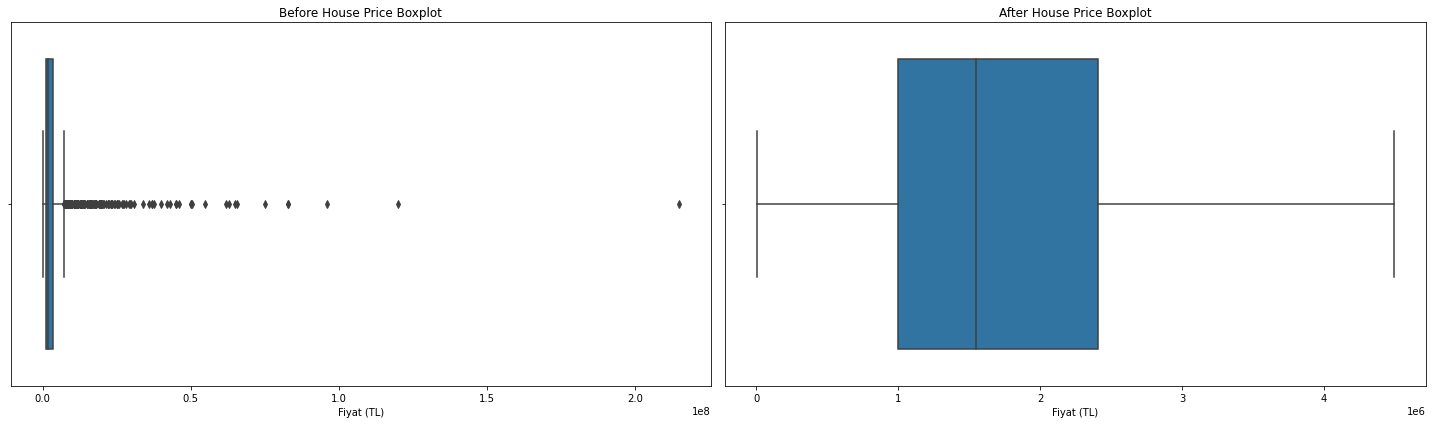

In [23]:
#Fiyat bazında outlier değerler kontrol edildi
df_out = df[df['Fiyat (TL)'] < 4500000]
print(df.shape, df_out.shape)
fig, axs = plt.subplots(1,2, figsize=[20,6])
sns.boxplot(x='Fiyat (TL)', data=df, ax=axs[0])
axs[0].set_title('Before House Price Boxplot')
sns.boxplot(x= 'Fiyat (TL)', data=df_out, ax=axs[1])
axs[1].set_title('After House Price Boxplot')
fig.tight_layout() 
plt.show()

In [24]:
#Yeni bir data frmae oluşturuldu. Fiyat aralığı belirlendi
df_new=df[(df["Fiyat (TL)"] >=350) & (df["Fiyat (TL)"] < 30000000)]

In [25]:
df_new.head()

,Fiyat (TL),İlçe,Binanın Yaşı,Binanın Kat Sayısı,Banyo Sayısı,Net Metrekare,Bulunduğu Kat Derece,Isıtma Tipi,Site İçerisinde,WC Sayısı,İlçe Derece,Toplam Oda Sayısı
0,875000,Arnavutköy,1,1,1,110,0.0,Merkezi Doğalgaz,0,1,5,3
1,4750000,Beyoğlu,1,2,1,135,0.0,Kombi Doğalgaz,0,1,3,3
2,190000,Bahçelievler,5,5,1,55,0.0,Isıtma Yok,0,1,4,2
3,450000,Bahçelievler,5,5,1,70,0.0,Isıtma Yok,0,1,4,2
4,235000,Küçükçekmece,5,6,1,45,0.0,Isıtma Yok,0,1,4,1


<AxesSubplot:title={'center':'İlçelere Göre Ortlama Fiyatları En Yüksek 10 İlçe'}, xlabel='İlçe', ylabel='Fiyat (TL)'>

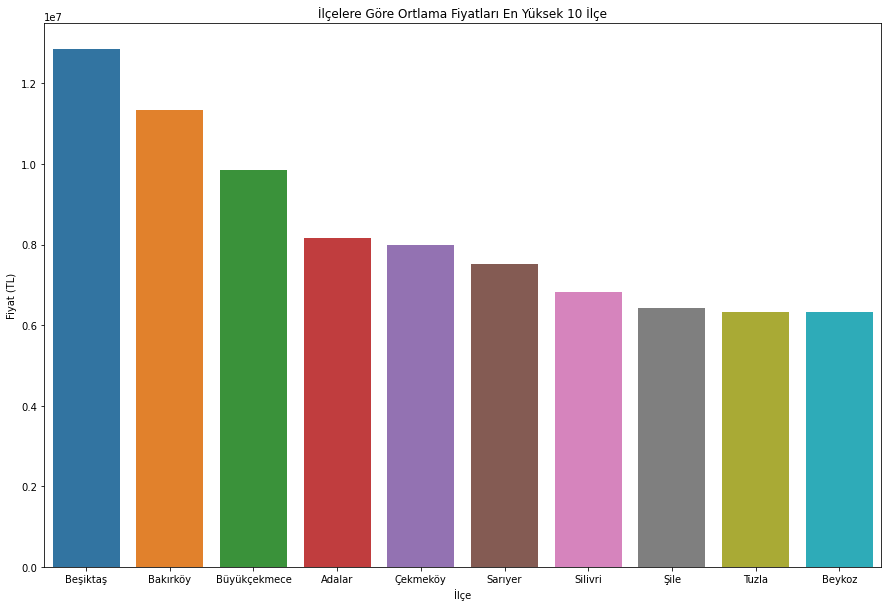

In [26]:
df_ilce_fiyat = df_new.groupby(['İlçe']).mean().sort_values('Fiyat (TL)',ascending=False).reset_index().iloc[:,:2].head(10)
df_ilce_fiyat

plt.figure(figsize=(15,10))
plt.title("İlçelere Göre Ortlama Fiyatları En Yüksek 10 İlçe", c="black")
sns.barplot(x='İlçe', y='Fiyat (TL)', data=df_ilce_fiyat)

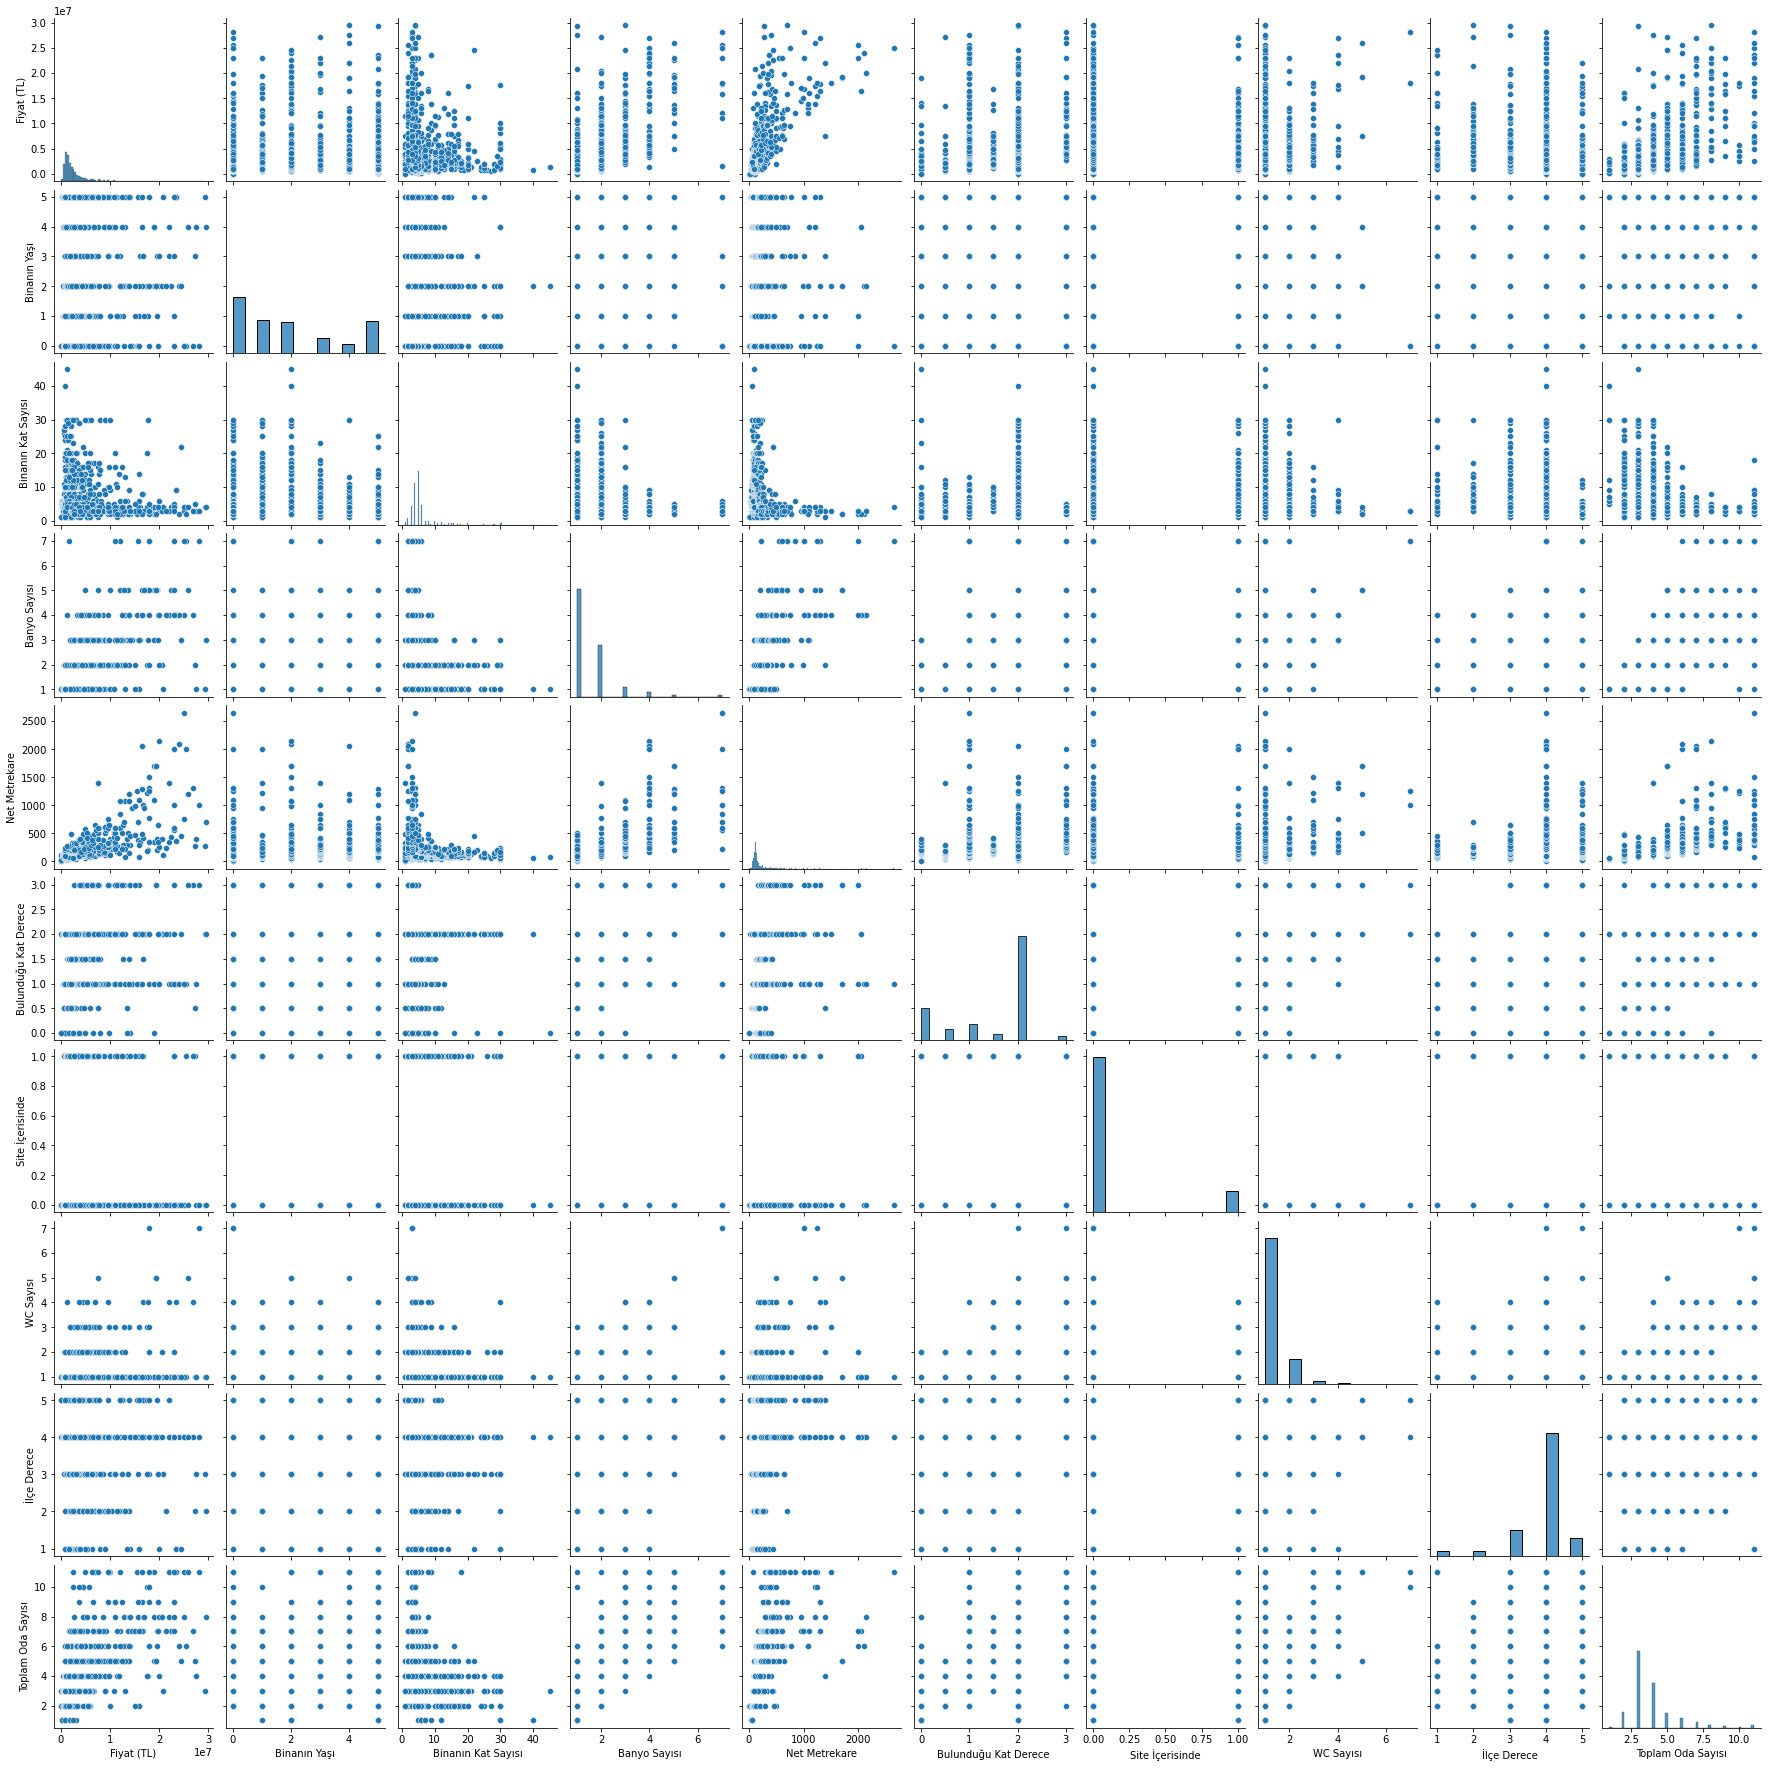

In [27]:
sns.pairplot(df_new)

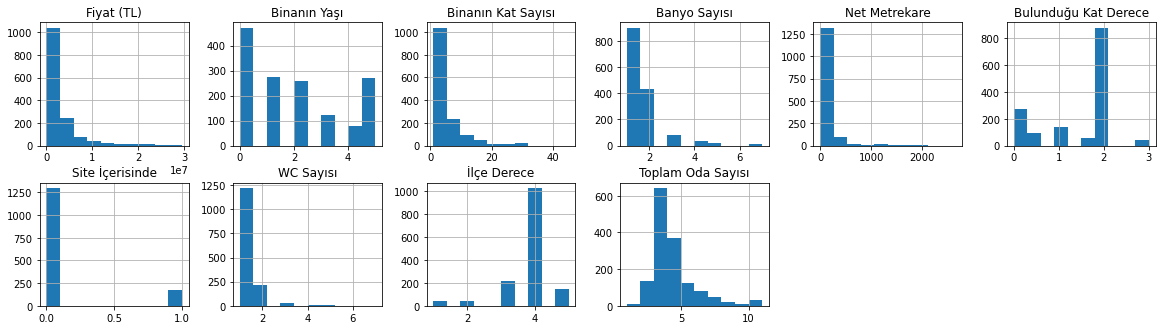

In [28]:
df_new.hist(layout = (6,6), sharex=False,figsize = (20,17))
plt.show()

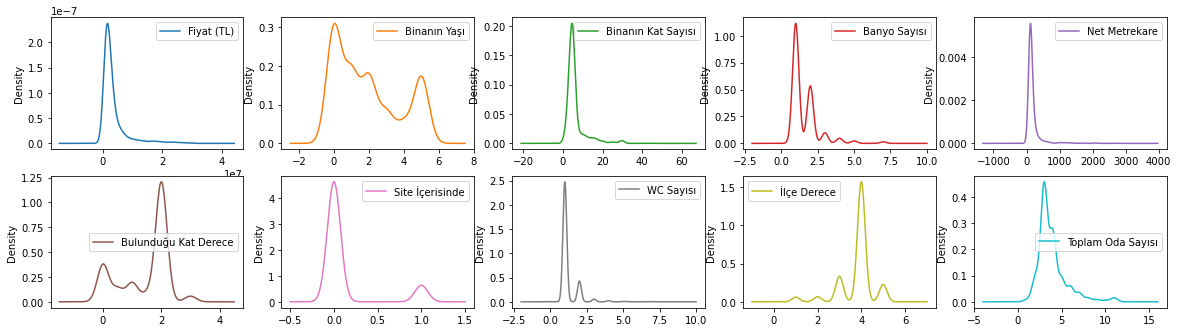

In [29]:
df_new.plot(kind='density', subplots=True, layout=(6,5), sharex=False,figsize = (20,17))
plt.show()

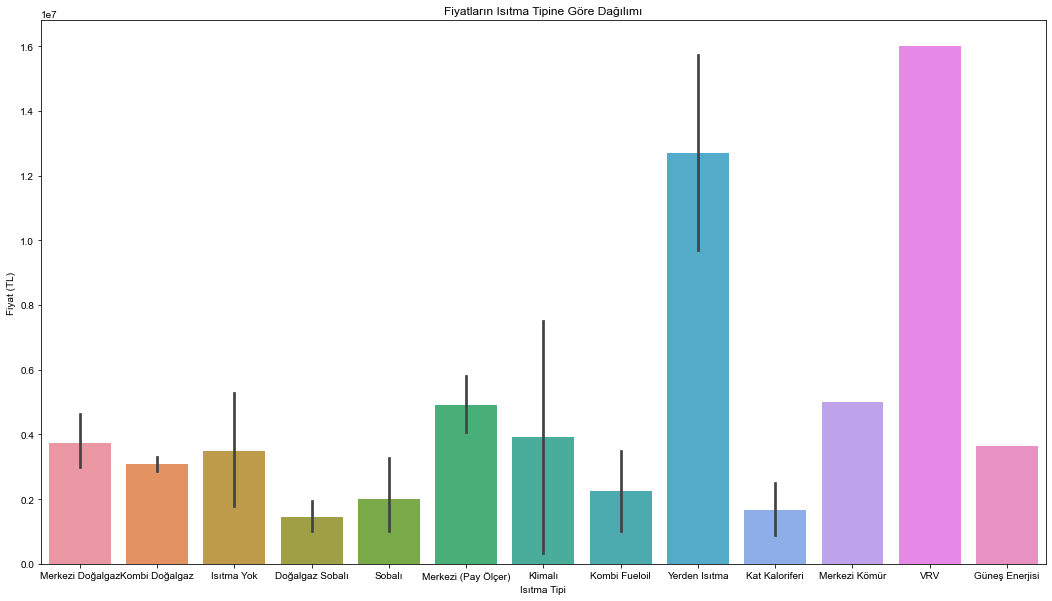

In [30]:
#İsitma tipi ile fiayat arasında doğru orantı var mı;?
df_isitma = df_new.groupby('Isıtma Tipi').median().sort_values('Fiyat (TL)',ascending=False).head(10)
df_isitma= df_isitma.reset_index()
df_isitma= df_new[['Isıtma Tipi','Fiyat (TL)']]

plt.figure(figsize=(18,10))
ax = sns.barplot(x='Isıtma Tipi', y='Fiyat (TL)', data=df_new)
plt.title("Fiyatların Isıtma Tipine Göre Dağılımı")
plt.xlabel('Isıtma Tipi')
plt.ylabel('Fiyat (TL)')
plt.xticks(rotation=0)
sns.set_style("ticks")
plt.show()

In [31]:
#Sanayi ve Teknoloji Bakanlığı tarafından yayınlanan ilçelerin sosyo-ekonomik gelişmişlik seviye skorlarından yararlanarak 
#ilçelere göre derecelnedimre işlemi yapıldı bu yüzden ilçe sütununu çıkartıyoruz
#Isıtma tipi ile target arasında korelasyonda düşük bir ilişki bulunduğundan çıkartıyoruz. 
df_new.drop(['İlçe', 'Isıtma Tipi'],axis=1, inplace=True)

C:\Users\pinar.ilter\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
df_new.head()

,Fiyat (TL),Binanın Yaşı,Binanın Kat Sayısı,Banyo Sayısı,Net Metrekare,Bulunduğu Kat Derece,Site İçerisinde,WC Sayısı,İlçe Derece,Toplam Oda Sayısı
0,875000,1,1,1,110,0.0,0,1,5,3
1,4750000,1,2,1,135,0.0,0,1,3,3
2,190000,5,5,1,55,0.0,0,1,4,2
3,450000,5,5,1,70,0.0,0,1,4,2
4,235000,5,6,1,45,0.0,0,1,4,1


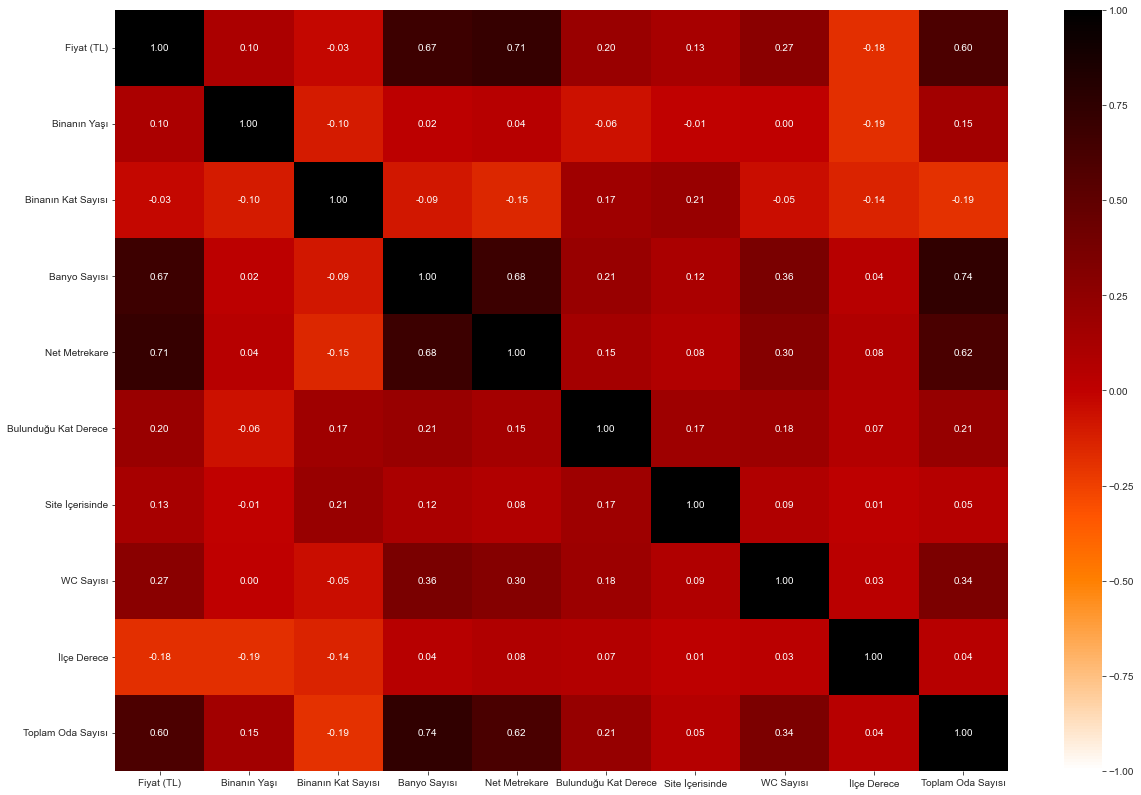

In [33]:
plt.figure(figsize=[20,14])
sns.heatmap(df_new.corr(), cmap="gist_heat_r", annot=True, vmin=-1, vmax=1, fmt='.2f');

In [34]:
df_new.columns

Index(['Fiyat (TL)', 'Binanın Yaşı', 'Binanın Kat Sayısı', 'Banyo Sayısı',
       'Net Metrekare', 'Bulunduğu Kat Derece', 'Site İçerisinde', 'WC Sayısı',
       'İlçe Derece', 'Toplam Oda Sayısı'],
      dtype='object')

**Linear Regresyon**

In [36]:
#Model denemesi
X=df_new.loc[:,['Binanın Yaşı', 'Binanın Kat Sayısı',
       'Banyo Sayısı', 'Fiyat (TL)', 'Bulunduğu Kat Derece',
       'Site İçerisinde', 'WC Sayısı', 'İlçe Derece', 'Toplam Oda Sayısı']]
y=df_new['Net Metrekare']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)
pred= lr_model.predict(X_val)

test_score = lr_model.score(X_test, y_test)
val_score = lr_model.score(X_val, y_val)
print('Test R2 Score:', round(test_score,3))
print('Val R2 Score:', round(val_score,3))
print("mse value:", np.mean((pred-y_val)**2), "\n")
print("Coefficients:\n", lr_model.coef_)

Test R2 Score: 0.683
Val R2 Score: 0.7
mse value: 14202.016627880148 

Coefficients:
 [-2.23885434e+00 -3.15760331e+00  5.96878244e+01  2.68439758e-05
 -7.89870907e+00 -6.30496818e+00  1.04769624e+01  4.11651367e+01
  8.05222777e+00]


**Feature Engineering**

C:\Users\PINAR~1.ILT\AppData\Local\Temp/ipykernel_26168/541844129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['log_Fiyat (TL)']= np.log(df_new['Fiyat (TL)'])


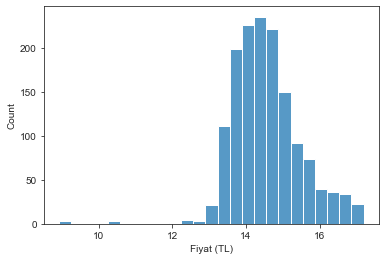

In [38]:
#Fiyat üzerinden logaritmik dönüşüm sağladığımızda;
df_new['log_Fiyat (TL)']= np.log(df_new['Fiyat (TL)'])
sns.histplot(np.log(df_new['Fiyat (TL)']), bins=25);

C:\Users\PINAR~1.ILT\AppData\Local\Temp/ipykernel_26168/1276996096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['log_Net Metrekare']= np.log(df_new['Net Metrekare'])


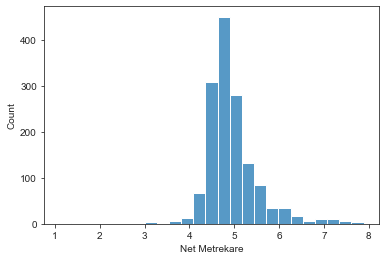

In [39]:
#Net metrekare üzerinde logaritmik dönüşüm sağladığımzda;
df_new['log_Net Metrekare']= np.log(df_new['Net Metrekare'])
sns.histplot(np.log(df_new['Net Metrekare']), bins=25);

Logaritmik dönüşümler yapıldıktan sonra model denemesini tekrar yapıyoruz

In [45]:
#Modelimizde logartimik dönüşüm yaparak elde ettiğimiz net metre kare üzerinden bir hedef belirleyerek eğitelim;
#X.columns
y=df_new['log_Net Metrekare']

In [47]:
print('Test R2 Score:', round(test_score,3))
print('Val R2 Score:', round(val_score,3))
print("mse value:", np.mean((pred-y_val)**2), "\n")
print("Coefficients:\n", lr_model.coef_)

Test R2 Score: 0.722
Val R2 Score: 0.752
mse value: 0.10111938917979618 

Coefficients:
 [-7.03816465e-03 -7.90413089e-03  9.76357654e-02  4.73295253e-08
  4.35813174e-02  1.42368728e-02  3.54703335e-02  6.14729918e-02
  1.48942773e-01]


In [51]:
#Modelimizde fiyat ve net metrekare üzerinde uyguladığımız logaritmik dönüşüm verilerini kullanalım;
X=df_new.loc[:,['Binanın Yaşı', 'Binanın Kat Sayısı',
       'Banyo Sayısı', 'log_Fiyat (TL)', 'Bulunduğu Kat Derece',
       'Site İçerisinde', 'WC Sayısı', 'İlçe Derece', 'Toplam Oda Sayısı']]
y=df_new['log_Net Metrekare']

In [52]:
#model denemelerimizde elde ettğimiz en iyi sonuç
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)
pred= lr_model.predict(X_val)

test_score = lr_model.score(X_test, y_test)
val_score = lr_model.score(X_val, y_val)
print('Test R2 Score:', round(test_score,3))
print('Val R2 Score:', round(val_score,3))
print("mse value:", np.mean((pred-y_val)**2), "\n")
print("Coefficients:\n", lr_model.coef_)

Test R2 Score: 0.767
Val R2 Score: 0.783
mse value: 0.0882871529360491 

Coefficients:
 [-0.00900642 -0.00809125  0.13945899  0.2091532   0.000364   -0.00433797
  0.03224891  0.07236833  0.13636442]


In [96]:
SS= StandardScaler()

X_train_scaled=SS.fit_transform(X_train.values)
X_val_scaled=SS.fit_transform(X_val.values)
X_test_scaled=SS.fit_transform(X_test.values)

In [112]:
lr_model_ridge = Ridge(alpha=1)

lr_model_ridge.fit(X_train_scaled, y_train)

print("Ridge Model R2 Score Value (Test): ", lr_model_ridge.score(X_test_scaled, y_test), "\n")
print("Ridge Model R2 Score Value (Validation): ", lr_model_ridge.score(X_val_scaled, y_val))

Ridge Model R2 Score Value (Test):  0.7653764215171399 

Ridge Model R2 Score Value (Validation):  0.6977649535183121


In [131]:
from sklearn.model_selection import KFold

X=df_new.loc[:,['Binanın Yaşı', 'Binanın Kat Sayısı',
       'Banyo Sayısı', 'log_Fiyat (TL)', 'Bulunduğu Kat Derece',
       'Site İçerisinde', 'WC Sayısı', 'İlçe Derece', 'Toplam Oda Sayısı']]
y=df_new['log_Net Metrekare']

X, X_test, y, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X, y = np.array(X), np.array(y)

In [138]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
#CROSVALİDATİON=CV
cv_lr_model_r2 = []
cv_lr_model_ridge_r2 = []

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    
    lr_model = LinearRegression()
    lr_model_ridge = Ridge(alpha=1)

    
    lr_model.fit(X_train, y_train)
    cv_lr_model_r2.append(round(lr_model.score(X_val, y_val),3))
    
    SS = StandardScaler()
    X_train_scaled = SS.fit_transform(X_train)
    X_val_scaled = SS.transform(X_val)
    
    lr_model_ridge.fit(X_train_scaled, y_train)
    cv_lr_model_ridge_r2.append(round(lr_model_ridge.score(X_val_scaled, y_val),3))


print('Linear Regression R2:', cv_lr_model_r2)
print('Ridge Regression R2:', cv_lr_model_ridge_r2, '\n')

Linear Regression R2: [0.744, 0.789, 0.701, 0.777, 0.698]
Ridge Regression R2: [0.744, 0.789, 0.701, 0.777, 0.698] 

